In [1]:
!echo $PATH

/home/zhenyan/.local/bin:/home/zhenyan/.local/bin:/home/zhenyan/anaconda3/bin:/home/zhenyan/anaconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/snap/bin:/usr/local/bioinfo/a5/bin:/usr/local/bioinfo/aragorn1.2.38:/usr/local/bioinfo/barrnap-0.7/bin:/usr/local/bioinfo/ca/bin:/usr/local/bioinfo/canu/bin:/usr/local/bioinfo/cap3:/usr/local/bioinfo/hisat2:/usr/local/bioinfo/kraken-0.10.5-beta:/usr/local/bioinfo/nanopolish:/usr/local/bioinfo/NOVOPlasty:/usr/local/bioinfo/Organelle_PBA:/usr/local/bioinfo/PASApipeline/bin:/usr/local/bioinfo/phylip:/usr/local/bioinfo/pilon:/usr/local/bioinfo/Platypus_0.8.1:/usr/local/bioinfo/prokka/bin:/usr/local/bioinfo/prottest3:/usr/local/bioinfo/signalp-4.1:/usr/local/bioinfo/soap:/usr/local/bioinfo/SPAdes/bin:/usr/local/bioinfo/sprai/bin:/usr/local/bioinfo/SSPACE-LongRead_v1-1:/usr/local/bioinfo/stacks-1.41:/usr/local/bioinfo/subread/bin:/usr/local/bioinfo/Unicycler:/usr/local/bioinfo/velvet:/usr/local/bioinfo/samtools/bin:/usr/l

In [8]:
%matplotlib inline
import pandas as pd
import os
import re
from pybedtools import BedTool
import numpy as np
import pybedtools
import re
import matplotlib.pyplot as plt
import json
import matplotlib
import subprocess
import numpy as np
import shutil
import seaborn as sns
import scipy.stats
import statsmodels.stats.multitest

In [2]:
pip install statsmodels

    100% |████████████████████████████████| 8.7MB 115kB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 3.1MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/2b/a8/f4c66eb529bb252d50e83dbf2909c6502e2f857550f22571ed8556f62d95/scipy-1.5.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/22/e7/4b2bdddb99f5f631d8c1de259897c2b7d65dcfcc1e0a6fd17a7f62923500/numpy-1.19.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c0/95/cb9820560a2713384ef49060b0087dfa2591c6db6f240215c2bce1f4211c/pandas-1.0.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a24774b3ff1c52d924a8a4cb04078a/six-1.15.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4f/a4/879454d49688e2fad93e59d7d4efda580b783c745fd2ec2a3adf87b0808d/pytz-2020.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/pa

In [3]:
#define your input folders
#define your input folders updated for haplotigs
GFF_FOLDER = 'Filtered_protein_and_gff/Assembly/RM'
GENOME_FOLDER = 'Filtered_protein_and_gff/Assembly/RM'
TE_FOLDER = 'TEanalysis/'
AT_analysis = 'TEanalysis/'
OUT_FOLDER = 'Filtered_protein_and_gff/Assembly/RM'
TMP_FOLDER = 'Filtered_protein_and_gff/Assembly/RM'

In [111]:
if not os.path.exists(TMP_FOLDER):
    os.mkdir(TMP_FOLDER)

In [24]:
#now get all the file names
genome_fn = os.path.join(GENOME_FOLDER, genome)
gff_fn = os.path.abspath('Filtered_protein_and_gff/Assembly/RM/Phapa1_AssemblyScaffolds.fasta.out.gff')

In [108]:
GENOME_NAME_DICT = {}
GENOME_NAME_DICT['Blumeria graminis f. sp. hordei'] = 'Blumeria_graminis_f.sp.hordei_DH14__GCA_900239735.1_BGH_DH14_v4_genomic'
GENOME_NAME_DICT['Marssonina brunnea'] = 'Marssonina_brunnea_GCF_000298775.1_ASM29877v1_genomic'
GENOME_NAME_DICT['Rhynchosporium commune'] = 'Rhynchosporium_commune__GCA_900074885.1_version_1_genomic'
GENOME_NAME_DICT['Parauncinula polyspora'] = 'parauncinula_polyspora.scaffolds'
GENOME_NAME_DICT['Phakopsora pachyrhizi'] = 'Phapa1_AssemblyScaffolds'
GENOME_NAME_DICT['Austropuccinia psidii'] = 'APSI_primary_v1'

In [4]:
#only use four#
GENOME_NAME_DICT = {}
GENOME_NAME_DICT['Blumeria graminis f. sp. hordei'] = 'Blumeria_graminis_f.sp.hordei_DH14__GCA_900239735.1_BGH_DH14_v4_genomic'
GENOME_NAME_DICT['Rhynchosporium commune'] = 'Rhynchosporium_commune__GCA_900074885.1_version_1_genomic'
GENOME_NAME_DICT['Phakopsora pachyrhizi'] = 'Phapa1_AssemblyScaffolds'
GENOME_NAME_DICT['Austropuccinia psidii'] = 'APSI_primary_v1'

In [9]:
GENOME_FN_DICT = {}
for key, value in GENOME_NAME_DICT.items():
        GENOME_FN_DICT[key] = os.path.join(GENOME_FOLDER, value + '.fna')

In [10]:
GENOME_FN_DICT

{'Blumeria graminis f. sp. hordei': 'Filtered_protein_and_gff/Assembly/RM/Blumeria_graminis_f.sp.hordei_DH14__GCA_900239735.1_BGH_DH14_v4_genomic.fna',
 'Rhynchosporium commune': 'Filtered_protein_and_gff/Assembly/RM/Rhynchosporium_commune__GCA_900074885.1_version_1_genomic.fna',
 'Phakopsora pachyrhizi': 'Filtered_protein_and_gff/Assembly/RM/Phapa1_AssemblyScaffolds.fna',
 'Austropuccinia psidii': 'Filtered_protein_and_gff/Assembly/RM/APSI_primary_v1.fna'}

In [11]:
GFF_FN_DICT = {}
for key, value in GENOME_FN_DICT.items():
    GFF_FN_DICT[key] = value + '.out.gff'

In [12]:
GFF_FN_DICT

{'Blumeria graminis f. sp. hordei': 'Filtered_protein_and_gff/Assembly/RM/Blumeria_graminis_f.sp.hordei_DH14__GCA_900239735.1_BGH_DH14_v4_genomic.fna.out.gff',
 'Rhynchosporium commune': 'Filtered_protein_and_gff/Assembly/RM/Rhynchosporium_commune__GCA_900074885.1_version_1_genomic.fna.out.gff',
 'Phakopsora pachyrhizi': 'Filtered_protein_and_gff/Assembly/RM/Phapa1_AssemblyScaffolds.fna.out.gff',
 'Austropuccinia psidii': 'Filtered_protein_and_gff/Assembly/RM/APSI_primary_v1.fna.out.gff'}

In [13]:
def RM_subset(RM_fn, selection):
    """Pulls in the the RM gff and subsets it for the selected
    features entered as lis."""
    df = pd.read_csv(RM_fn, header = None, comment='#', sep = '\t')
    tmp_fn_list = []
    for select in selection:
        tmp_df = df[df[8].str.contains(select)]
        tmp_out_fn = RM_fn.replace('.gff', F'.{select}.gff')
        tmp_df.to_csv(tmp_out_fn, header = None, index = None, sep = '\t')
        tmp_fn_list.append(tmp_out_fn)
    return tmp_fn_list

In [14]:
SUB_GFF_FN_DICT = {}
selection = ['Tad1', 'Gypsy', 'Copia']
for key, value in GFF_FN_DICT.items():
    SUB_GFF_FN_DICT[key] = RM_subset(value, selection)

In [15]:
SUB_GFF_FN_DICT

{'Blumeria graminis f. sp. hordei': ['Filtered_protein_and_gff/Assembly/RM/Blumeria_graminis_f.sp.hordei_DH14__GCA_900239735.1_BGH_DH14_v4_genomic.fna.out.Tad1.gff',
  'Filtered_protein_and_gff/Assembly/RM/Blumeria_graminis_f.sp.hordei_DH14__GCA_900239735.1_BGH_DH14_v4_genomic.fna.out.Gypsy.gff',
  'Filtered_protein_and_gff/Assembly/RM/Blumeria_graminis_f.sp.hordei_DH14__GCA_900239735.1_BGH_DH14_v4_genomic.fna.out.Copia.gff'],
 'Rhynchosporium commune': ['Filtered_protein_and_gff/Assembly/RM/Rhynchosporium_commune__GCA_900074885.1_version_1_genomic.fna.out.Tad1.gff',
  'Filtered_protein_and_gff/Assembly/RM/Rhynchosporium_commune__GCA_900074885.1_version_1_genomic.fna.out.Gypsy.gff',
  'Filtered_protein_and_gff/Assembly/RM/Rhynchosporium_commune__GCA_900074885.1_version_1_genomic.fna.out.Copia.gff'],
 'Phakopsora pachyrhizi': ['Filtered_protein_and_gff/Assembly/RM/Phapa1_AssemblyScaffolds.fna.out.Tad1.gff',
  'Filtered_protein_and_gff/Assembly/RM/Phapa1_AssemblyScaffolds.fna.out.Gypsy.g

In [16]:
def reverse_bed(genome_fn, gff_fn):
    """A bit of a hack to get the reverse of 
    a gff_fn"""
    !samtools faidx {genome_fn}
    tmp_fn = genome_fn + '.genome_file'
    !cut -f1,2 {genome_fn}.fai | sort -k 1,1 > {tmp_fn}
    tmp_out_fn = gff_fn.replace('.gff', '.reverse.nr.bed')
    pybedtools.BedTool(gff_fn).sort()\
    .merge().complement(g=tmp_fn).saveas(tmp_out_fn)
    return tmp_out_fn

In [17]:
###Generate the non-TE GFF/bed which requires 
### the genome file as well
selection.append('non_TE')
for key, value in SUB_GFF_FN_DICT.items():
    tmp_fn = reverse_bed(GENOME_FN_DICT[key], GFF_FN_DICT[key])
    #print(value.append(tmp_fn))
    SUB_GFF_FN_DICT[key].append(tmp_fn)

In [18]:
#next steps is to generate the whole counting
#and result dicts followed by plotting.
SUB_GFF_FN_DICT

{'Blumeria graminis f. sp. hordei': ['Filtered_protein_and_gff/Assembly/RM/Blumeria_graminis_f.sp.hordei_DH14__GCA_900239735.1_BGH_DH14_v4_genomic.fna.out.Tad1.gff',
  'Filtered_protein_and_gff/Assembly/RM/Blumeria_graminis_f.sp.hordei_DH14__GCA_900239735.1_BGH_DH14_v4_genomic.fna.out.Gypsy.gff',
  'Filtered_protein_and_gff/Assembly/RM/Blumeria_graminis_f.sp.hordei_DH14__GCA_900239735.1_BGH_DH14_v4_genomic.fna.out.Copia.gff',
  'Filtered_protein_and_gff/Assembly/RM/Blumeria_graminis_f.sp.hordei_DH14__GCA_900239735.1_BGH_DH14_v4_genomic.fna.out.reverse.nr.bed'],
 'Rhynchosporium commune': ['Filtered_protein_and_gff/Assembly/RM/Rhynchosporium_commune__GCA_900074885.1_version_1_genomic.fna.out.Tad1.gff',
  'Filtered_protein_and_gff/Assembly/RM/Rhynchosporium_commune__GCA_900074885.1_version_1_genomic.fna.out.Gypsy.gff',
  'Filtered_protein_and_gff/Assembly/RM/Rhynchosporium_commune__GCA_900074885.1_version_1_genomic.fna.out.Copia.gff',
  'Filtered_protein_and_gff/Assembly/RM/Rhynchosporiu

In [19]:
def do_RIP_call(fac_fn):
    "Return pandas dataframe with caculations reading in the faCount outfile."
    faC_header = ['seqID','len','A','C','G','T','N','cpg','AA','AC','AG',
                 'AT','CA','CC','CG','CT','GA','GC','GG','GT','TA','TC','TG','TT']
    count_dict = {}
    for n_pattern in faC_header:
        count_dict[n_pattern] = []
    dtypes = {}
    for x in faC_header:
        dtypes[x] = 'int'
    dtypes['seqID'] = 'str'
    with open(fac_fn) as fh: 
        for line in fh:
            line = line.rstrip()
            split_line = re.split('\t', line)
            if not line.startswith('#'):
                #if len(split_line) > len(faC_header):
                  #  split_line = split_line[0:len(faC_header)+1]

                for n_pattern, value in zip(faC_header, split_line):
                    count_dict[n_pattern].append(value)
    df = pd.DataFrame.from_dict(count_dict)
    df = df.astype(dtypes)
    df['TpA/ApT'] = df['TA']/df['AT']
    df['CpA + TpG/ApC + GpT'] = (df['CA'] + df['TG'])/(df['AC']+df['GT'])
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    return df

In [20]:
def AT_content_df(bed_fn, contig_fn, intervals, merge=True):
    """Caculate the %AT for contigs and group %AT in specific intervals."""
    bed = BedTool(bed_fn)
    if merge == True:
        bed.sort().merge()
    #specify datatypes if possible
    tmp_fn = bed_fn.replace('.bed', '.AT.bed.tmp')
    dtype_dict = {0:str, 1:np.int32, 2:np.int32, 3:str, 4:str, 5:str, 6:float}
    bed.nucleotide_content(fi=contig_fn).saveas(tmp_fn)
    #bedtools nuc -fi {contig_fn} -bed {bed_fn} > {tmp_fn}
    
    if len(bed.to_dataframe().columns) == 6:
        dtype_dict = {0:str, 1:np.int32, 2:np.int32, 3:str, 4:str, 5:str, 6:float}
        df = pd.read_csv( tmp_fn, sep='\t',header=None,dtype=dtype_dict, usecols=[0,1,2,3,6], skiprows=1)
        df.rename(columns={6:'%AT'}, inplace=True)
    elif len(bed.to_dataframe().columns) == 3:
        dtype_dict = {0:str, 1:np.int32, 2:np.int32, 3:float}
        df = pd.read_csv( tmp_fn, sep='\t',header=None,dtype=dtype_dict, usecols=[0,1,2,3], skiprows=1)
        df.rename(columns={3:'%AT'}, inplace=True)
    df['%AT'] = df['%AT'].astype('float')
    df['W_Len'] = df[2] - df[1]
    
    df['Intervals'] = pd.cut(df['%AT'], intervals)
    grouped = df.groupby('Intervals')
    ###group by the edge
    ####get the length of the intervals and plot the sum for each interval
    ###edge
    
    
    sum_df = grouped.agg({'%AT': 'count', 'W_Len': 'sum'})
    sum_df['Interval_edge'] = intervals.right
    sum_df.fillna(0, inplace=True)
    sum_df['norm_count_AT'] = sum_df['%AT']/sum_df['%AT'].sum()
    sum_df['norm_W_Len'] = sum_df['W_Len']/sum_df['W_Len'].sum()
    os.remove(tmp_fn)
    return df, sum_df

In [21]:
###Generate the non-TE GFF/bed which requires 
### the genome file as well
selection.append('non_TE')
for key, value in SUB_GFF_FN_DICT.items():
    tmp_fn = reverse_bed(GENOME_FN_DICT[key], GFF_FN_DICT[key])
    #print(value.append(tmp_fn))
    SUB_GFF_FN_DICT[key].append(tmp_fn)

In [22]:
#get the fa and fac count done.
SUB_FA_FN_DICT = {}
SUB_FAC_FN_DICT = {}
for key, bed_files in SUB_GFF_FN_DICT.items():
    tmp_fa_list = []
    tmp_fac_list = []
    for tmp_bed_file in bed_files:
        #get the fa files from the bedfiles
        ending = os.path.basename(tmp_bed_file).split('.')[-1]
        tmp_fa_out_fn = os.path.join(TMP_FOLDER, os.path.basename(tmp_bed_file)\
                              .replace(ending, 'fa'))
        tmp_bed = BedTool(tmp_bed_file)
        tmp_bed.sequence(fi=GENOME_FN_DICT[key]).save_seqs(tmp_fa_out_fn)
        tmp_fa_list.append(tmp_fa_out_fn)
        #now do the fac count
        tmp_fac_out_fn = tmp_fa_out_fn.replace('.fa' , '.fac')
        facount(tmp_fa_out_fn, tmp_fac_out_fn)
        tmp_fac_list.append(tmp_fac_out_fn)
    SUB_FA_FN_DICT[key] = tmp_fa_list
    SUB_FAC_FN_DICT[key] = tmp_fac_list

NameError: name 'facount' is not defined

In [25]:
SUB_FA_FN_DICT = {}
SUB_FAC_FN_DICT = {}
for key, bed_files in SUB_GFF_FN_DICT.items():
    tmp_fa_list = []
    tmp_fac_list = []
    for tmp_bed_file in bed_files:
        #get the fa files from the bedfiles
        ending = os.path.basename(tmp_bed_file).split('.')[-1]
        tmp_fa_out_fn = os.path.join(TMP_FOLDER, os.path.basename(tmp_bed_file)\
                              .replace(ending, 'fa'))
        tmp_bed = BedTool(tmp_bed_file)
        tmp_bed.sequence(fi=GENOME_FN_DICT[key]).save_seqs(tmp_fa_out_fn)
        tmp_fa_list.append(tmp_fa_out_fn)
        #now do the fac count
        tmp_fac_out_fn = tmp_fa_out_fn.replace('.fa' , '.fac')
        tmp_fac_list.append(tmp_fac_out_fn)
    SUB_FA_FN_DICT[key] = tmp_fa_list
    SUB_FAC_FN_DICT[key] = tmp_fac_list

In [26]:
##rename things to be name compatible with the upstream part ['Tad1', 'Gypsy', 'Copia', 'non_TE']
new_selection = ['Tad1', 'ClassI:LTR:Gypsy','ClassI:LTR:Copia', 'non_TE']

In [27]:
SUB_S_DICT = {}
SUB_L_DICT = {}
SUB_length_DICT = {}

for key, fac_list in SUB_FAC_FN_DICT.items():
    #now get the different dictionaries
    #'TpA/ApT'
    tmp_S = {}
    #'CpA + TpG/ApC + GpT'
    tmp_L = {}
    #length
    tmp_length = {}
    for name, tmp_fac_fn in zip(new_selection, fac_list):
        print(name)
        
        tmp_df = do_RIP_call(tmp_fac_fn)
        #selection would be the keys
        tmp_S[name] = tmp_df['TpA/ApT'].values
        tmp_L[name] = tmp_df['CpA + TpG/ApC + GpT'].values
        tmp_length[name] = tmp_df['len'].values
    SUB_S_DICT[key] = tmp_S
    SUB_L_DICT[key] = tmp_L
    SUB_length_DICT[key] = tmp_length

Tad1
ClassI:LTR:Gypsy
ClassI:LTR:Copia
non_TE
Tad1
ClassI:LTR:Gypsy
ClassI:LTR:Copia
non_TE
Tad1
ClassI:LTR:Gypsy
ClassI:LTR:Copia
non_TE
Tad1
ClassI:LTR:Gypsy
ClassI:LTR:Copia
non_TE


In [28]:
print('#TpA/ApT')
for key, tmp_dict in SUB_S_DICT.items():
    print(F'\n\n#####{key}####')
    for name in new_selection[1:]:
        tmp_x = np.median(tmp_dict[name][(SUB_length_DICT[key][name] > 500)&(~np.isnan(tmp_dict[name]))][:-1])
        print(F'This is the median for {name}: {tmp_x}')

#TpA/ApT


#####Blumeria graminis f. sp. hordei####
This is the median for ClassI:LTR:Gypsy: 0.7605847204438754
This is the median for ClassI:LTR:Copia: 0.7240461060410952
This is the median for non_TE: 0.796875


#####Rhynchosporium commune####
This is the median for ClassI:LTR:Gypsy: 1.5909090909090908
This is the median for ClassI:LTR:Copia: 1.6187845303867403
This is the median for non_TE: 1.2709826318260053


#####Phakopsora pachyrhizi####
This is the median for ClassI:LTR:Gypsy: 0.7777777777777778
This is the median for ClassI:LTR:Copia: 0.6666666666666666
This is the median for non_TE: 0.8536585365853658


#####Austropuccinia psidii####
This is the median for ClassI:LTR:Gypsy: 0.7563025210084033
This is the median for ClassI:LTR:Copia: 0.7534246575342466
This is the median for non_TE: 0.7803030303030303


In [29]:
print('CpA + TpG/ApC + GpT')
for key, tmp_dict in SUB_L_DICT.items():
    print(F'\n\n#####{key}####')
    for name in new_selection[1:]:
        tmp_x = np.median(tmp_dict[name][(SUB_length_DICT[key][name] > 500)&(~np.isnan(tmp_dict[name]))][:-1])
        print(F'This is the median for {name}: {tmp_x}')

CpA + TpG/ApC + GpT


#####Blumeria graminis f. sp. hordei####
This is the median for ClassI:LTR:Gypsy: 1.2605126218824203
This is the median for ClassI:LTR:Copia: 1.342293385619198
This is the median for non_TE: 1.2555380301437085


#####Rhynchosporium commune####
This is the median for ClassI:LTR:Gypsy: 0.15384615384615385
This is the median for ClassI:LTR:Copia: 0.2604166666666667
This is the median for non_TE: 0.781146565539565


#####Phakopsora pachyrhizi####
This is the median for ClassI:LTR:Gypsy: 1.4491525423728813
This is the median for ClassI:LTR:Copia: 1.4931506849315068
This is the median for non_TE: 1.3647798742138364


#####Austropuccinia psidii####
This is the median for ClassI:LTR:Gypsy: 1.5369774919614148
This is the median for ClassI:LTR:Copia: 1.4408602150537635
This is the median for non_TE: 1.507936507936508


In [136]:
#now the plotting
cutoff = 500
col = 6
rows = 6 // col
if 6 % col > 0:
    rows +=1
print(rows)

1


In [137]:
ordered_keys = [ 'Austropuccinia psidii', 'Phakopsora pachyrhizi', 'Marssonina brunnea', 'Rhynchosporium commune', 'Parauncinula polyspora', 'Blumeria graminis f. sp. hordei']

In [138]:
cutoff = 0

TpA/ApT


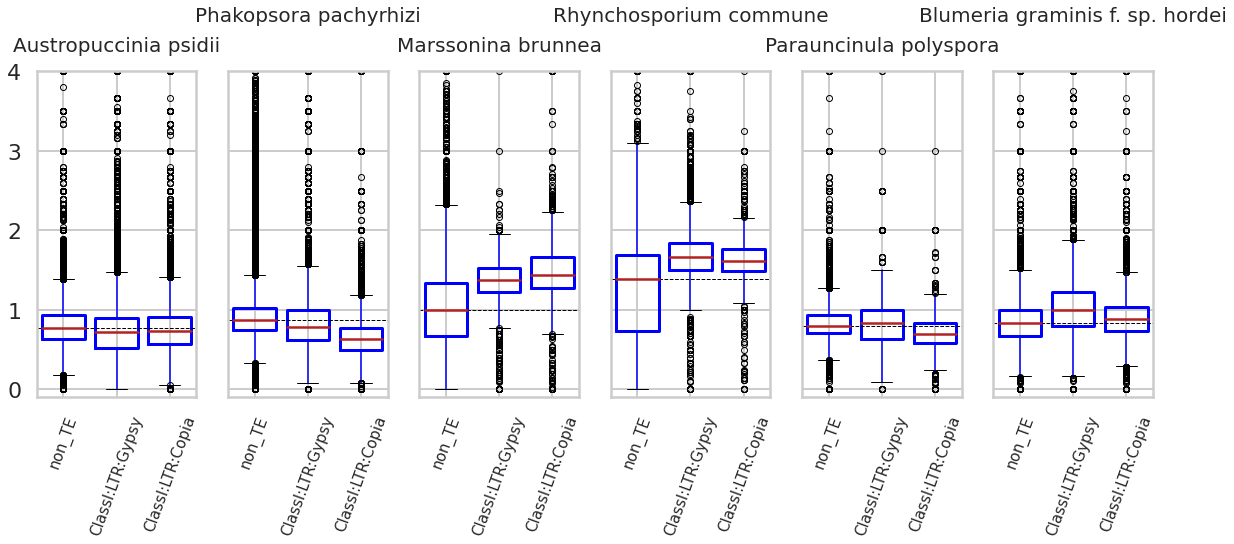

In [154]:
print('TpA/ApT')
sns.set_style("whitegrid")
sns.set_context("poster")
boxprops = dict(linewidth=3, color='b')
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
whiskerprops = dict(linewidth=1.5, color='b')

fig, ax = plt.subplots(rows, col, figsize = (20, 6), sharey=True)
new_selection = ['non_TE','ClassI:LTR:Gypsy','ClassI:LTR:Copia']

#tmp_box = 

count = 0

for key in ordered_keys:
    tmp_non_TE_mean = np.median(SUB_S_DICT[key]['non_TE'][(SUB_length_DICT[key]['non_TE'] > cutoff)\
                                               &(~np.isnan(SUB_S_DICT[key]['non_TE']))][:-1])
    tmp_data = []
    for name in new_selection:
        tmp_val  = SUB_S_DICT[key][name][(SUB_length_DICT[key][name] > cutoff)\
                                               &(~np.isnan(SUB_S_DICT[key][name]))][:-1]
        tmp_data.append(tmp_val)
    ax[count].boxplot(tmp_data, vert=True,  # vertical box alignment
                         patch_artist=False,
             widths=0.8,
            boxprops=boxprops,
            medianprops=medianprops,
            whiskerprops = whiskerprops)
    

    ax[count].axhline(tmp_non_TE_mean, c='black', ls='--', linewidth = 1)
    ax[count].set_title(key, pad= (20 + 30 * (count%2)), fontsize= 20)
    ax[count].set_xticklabels(new_selection, rotation = 70, fontsize= 15)
    ax[0].set_ylim(-0.1, 4)
    count += 1

CpA + TpG/ApC + GpT


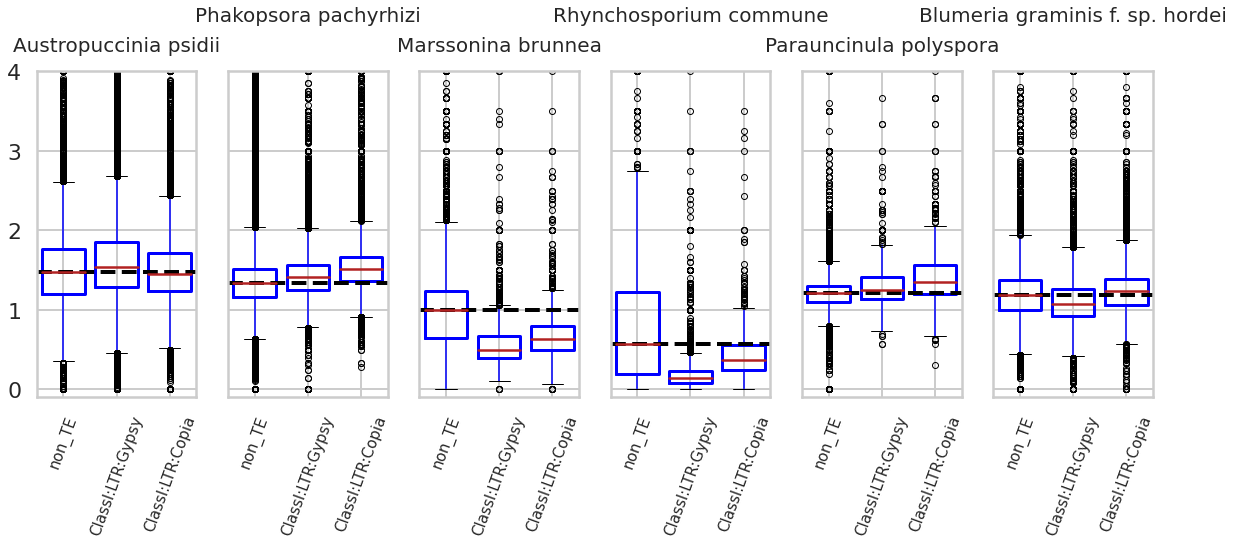

In [155]:
print('CpA + TpG/ApC + GpT')
sns.set_style("whitegrid")
sns.set_context("poster")
boxprops = dict(linewidth=3, color='b')
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
whiskerprops = dict(linewidth=1.5, color='b')

fig, ax = plt.subplots(rows, col, figsize = (20, 6), sharey=True)
new_selection = ['non_TE','ClassI:LTR:Gypsy','ClassI:LTR:Copia']
#tmp_box = 

count = 0

for key in ordered_keys:
    tmp_non_TE_mean = np.median(SUB_L_DICT[key]['non_TE'][(SUB_length_DICT[key]['non_TE'] > cutoff)\
                                               &(~np.isnan(SUB_L_DICT[key]['non_TE']))][:-1])
    tmp_data = []
    for name in new_selection:
        tmp_val  = SUB_L_DICT[key][name][(SUB_length_DICT[key][name] > cutoff)\
                                               &(~np.isnan(SUB_L_DICT[key][name]))][:-1]
        tmp_data.append(tmp_val)
    ax[count].boxplot(tmp_data, vert=True,  # vertical box alignment
                         patch_artist=False,
             widths=0.8,
            boxprops=boxprops,
            medianprops=medianprops,
            whiskerprops = whiskerprops)
    

    ax[count].axhline(tmp_non_TE_mean, c='black', ls='--', linewidth = 4)
    ax[count].set_title(key, pad= (20 + 30 * (count%2)), fontsize= 20)
    ax[count].set_xticklabels(new_selection, rotation = 70, fontsize= 15)
    ax[0].set_ylim(-0.1, 4)
    count += 1

In [102]:
tmp_non_TE_mean

0.875

In [33]:
ordered_keys = [ 'Austropuccinia psidii', 'Phakopsora pachyrhizi', 'Rhynchosporium commune', 'Blumeria graminis f. sp. hordei']

In [35]:
cutoff = 400
col = 4
rows = 1

TpA/ApT


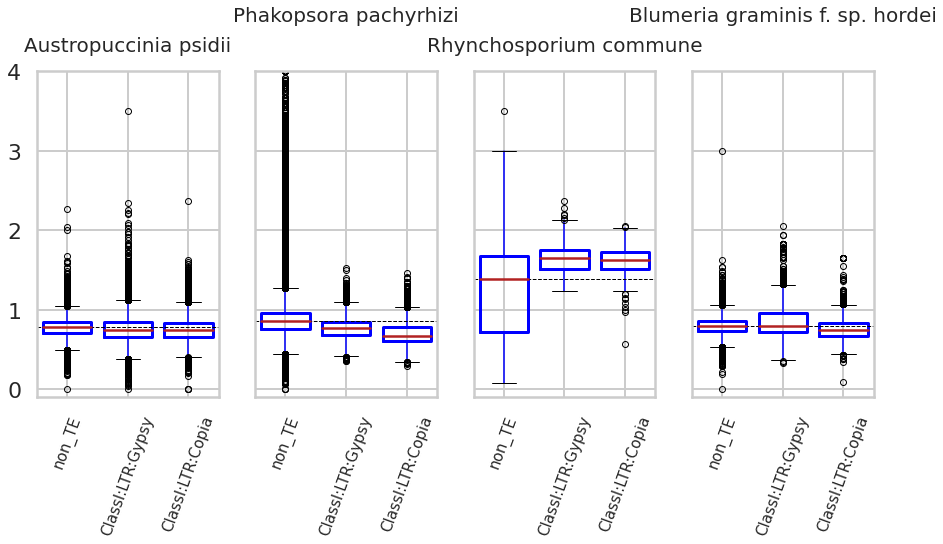

In [38]:
print('TpA/ApT')
sns.set_style("whitegrid")
sns.set_context("poster")
boxprops = dict(linewidth=3, color='b')
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
whiskerprops = dict(linewidth=1.5, color='b')

fig, ax = plt.subplots(rows, col, figsize = (15, 6), sharey=True)
new_selection = ['non_TE','ClassI:LTR:Gypsy','ClassI:LTR:Copia']

#tmp_box = 

count = 0

for key in ordered_keys:
    tmp_non_TE_mean = np.median(SUB_S_DICT[key]['non_TE'][(SUB_length_DICT[key]['non_TE'] > cutoff)\
                                               &(~np.isnan(SUB_S_DICT[key]['non_TE']))][:-1])
    tmp_data = []
    for name in new_selection:
        tmp_val  = SUB_S_DICT[key][name][(SUB_length_DICT[key][name] > cutoff)\
                                               &(~np.isnan(SUB_S_DICT[key][name]))][:-1]
        tmp_data.append(tmp_val)
    ax[count].boxplot(tmp_data, vert=True,  # vertical box alignment
                         patch_artist=False,
             widths=0.8,
            boxprops=boxprops,
            medianprops=medianprops,
            whiskerprops = whiskerprops)
    

    ax[count].axhline(tmp_non_TE_mean, c='black', ls='--', linewidth = 1)
    ax[count].set_title(key, pad= (20 + 30 * (count%2)), fontsize= 20)
    ax[count].set_xticklabels(new_selection, rotation = 70, fontsize= 15)
    ax[0].set_ylim(-0.1, 4)
    count += 1

CpA + TpG/ApC + GpT


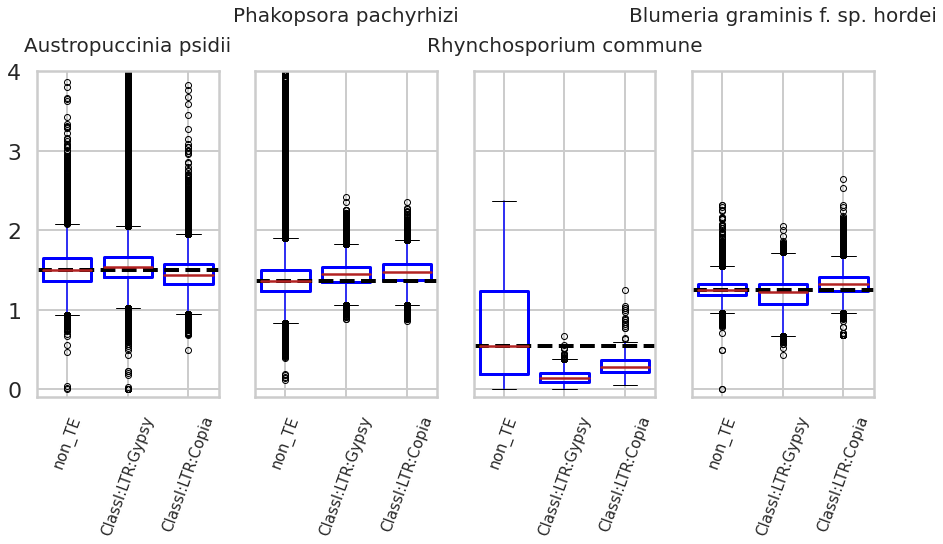

In [39]:
print('CpA + TpG/ApC + GpT')
sns.set_style("whitegrid")
sns.set_context("poster")
boxprops = dict(linewidth=3, color='b')
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
whiskerprops = dict(linewidth=1.5, color='b')

fig, ax = plt.subplots(rows, col, figsize = (15, 6), sharey=True)
new_selection = ['non_TE','ClassI:LTR:Gypsy','ClassI:LTR:Copia']
#tmp_box = 

count = 0

for key in ordered_keys:
    tmp_non_TE_mean = np.median(SUB_L_DICT[key]['non_TE'][(SUB_length_DICT[key]['non_TE'] > cutoff)\
                                               &(~np.isnan(SUB_L_DICT[key]['non_TE']))][:-1])
    tmp_data = []
    for name in new_selection:
        tmp_val  = SUB_L_DICT[key][name][(SUB_length_DICT[key][name] > cutoff)\
                                               &(~np.isnan(SUB_L_DICT[key][name]))][:-1]
        tmp_data.append(tmp_val)
    ax[count].boxplot(tmp_data, vert=True,  # vertical box alignment
                         patch_artist=False,
             widths=0.8,
            boxprops=boxprops,
            medianprops=medianprops,
            whiskerprops = whiskerprops)
    

    ax[count].axhline(tmp_non_TE_mean, c='black', ls='--', linewidth = 4)
    ax[count].set_title(key, pad= (20 + 30 * (count%2)), fontsize= 20)
    ax[count].set_xticklabels(new_selection, rotation = 70, fontsize= 15)
    ax[0].set_ylim(-0.1, 4)
    count += 1